In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chathuryapampana","key":"60fe8338ffe396d9b267e5ae72aa60c9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 95% 62.0M/65.2M [00:02<00:00, 40.4MB/s]
100% 65.2M/65.2M [00:02<00:00, 26.6MB/s]


In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip file to Colab
uploaded = files.upload()

# Get the filename of the uploaded file
zip_file_name = list(uploaded.keys())[0]

# Set the path to the uploaded file
zip_file_path = zip_file_name

# Set the extraction folder path
extraction_folder = '/content/extracted_data'  # Extract to a folder within Colab

# Create the extraction folder if it doesn't exist
os.makedirs(extraction_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

print(f"File '{zip_file_name}' extracted to '{extraction_folder}'")

Saving archive (6).zip to archive (6).zip
File 'archive (6).zip' extracted to '/content/extracted_data'


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Set the path to the directory containing your images
data_directory = '/content/extracted_data'  # Change this if your images are in a subfolder

# Parameters for image processing
img_height, img_width = 48, 48  # Adjust this based on your specific dataset
batch_size = 32


In [ ]:
# Get a batch of images and labels from the dataset
imgs, labels = next(image_dataset)

# Print the shape of the image batch
print("Image shape:", imgs.shape)

Image shape: (32, 48, 48, 3)


In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow
!pip install transformers
!pip install keras
!pip install numpy
!pip install matplotlib
!pip install scikit-learn


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Image Data Directory
data_directory = '/content/extracted_data'

# Set parameters
img_height, img_width = 48, 48
batch_size = 32

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the text data
text_data = pd.read_csv('training.csv')  # Adjust the file path as necessary


Found 28711 images belonging to 2 classes.
Found 7176 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
def build_cnn_model(num_classes): # Pass num_classes as argument
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Use num_classes here

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Get the number of classes from the generator
num_classes = train_generator.num_classes
cnn_model = build_cnn_model(num_classes) # Pass num_classes to the function
cnn_model.summary()

# Train the model
cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 838,978 (3.20 MB)

 Trainable params: 838,978 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 114s 124ms/step - accuracy: 0.7984 - loss: 0.5207 - val_accuracy: 0.8000 - val_loss: 0.5022
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 135s 117ms/step - accuracy: 0.7989 - loss: 0.5085 - val_accuracy: 0.8000 - val_loss: 0.5007
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 105s 116ms/step - accuracy: 0.7950 - loss: 0.5091 - val_accuracy: 0.8000 - val_loss: 0.5006
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 146s 121ms/step - accuracy: 0.7993 - loss: 0.5033 - val_accuracy: 0.8000 - val_loss: 0.5012
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 106s 117ms/step - accuracy: 0.8009 - loss: 0.4999 - val_accuracy: 0.8000 - val_loss: 0.5014
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 105s 117ms/step - accuracy: 0.8010 - loss: 0.4983 - val_accuracy: 0.8000 - val_loss: 0.5012
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 106s 118ms/step - accuracy: 0.7987 - loss: 0.4989 - val_accuracy: 0.8000 - val_loss: 0.5024
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 141s 117ms/step - accuracy: 0.7960 - loss: 0.49

In [ ]:
from transformers import BertTokenizer, TFBertModel

# Load BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Prepare text data for BERT
def encode_text(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='tf', max_length=512)

text_encodings = encode_text(text_data['text'])  # Assuming the text column is named 'text'


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are i

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM

# Define the RNN model
def build_rnn_model(vocab_size, embedding_dim):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(vocab_size, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Example: Using dummy vocab_size and embedding_dim
vocab_size = 10000  # Adjust based on your data
embedding_dim = 128
rnn_model = build_rnn_model(vocab_size, embedding_dim)


In [ ]:
def predict_emotion_and_generate_text(image):
    # Process image for CNN
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    emotion_pred = cnn_model.predict(image)
    emotion_index = np.argmax(emotion_pred)

    # Get corresponding text based on emotion
    emotion_text = text_data.loc[emotion_index, 'text']  # Assuming text data aligns with emotion classes

    return emotion_index, emotion_text


In [ ]:
!pip install Pillow



In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/archive (6).zip'   # Change this to your actual zip file name

# Set the extraction folder path
extraction_folder = '/content/extracted_data'  # Extract to a folder within Colab

# Create the extraction folder if it doesn't exist
os.makedirs(extraction_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

print(f"File extracted to '{extraction_folder}'")


File extracted to '/content/extracted_data'


In [ ]:
# List files in the extracted data directory
extracted_data_path = '/content/extracted_data'
files_in_directory = os.listdir(extracted_data_path)

# Display the files
files_in_directory


['train', 'test']

In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the zip file to Colab
uploaded = files.upload()

# Get the filename of the uploaded file
zip_file_name = list(uploaded.keys())[0]

# Set the path to the uploaded file
zip_file_path = zip_file_name

# Set the extraction folder path
extraction_folder = '/content/extracted_data'  # Extract to a folder within Colab

# Create the extraction folder if it doesn't exist
os.makedirs(extraction_folder, exist_ok=True)

# Step 2: Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

print(f"File '{zip_file_name}' extracted to '{extraction_folder}'")

# Step 3: List files in the extracted data directory
files_in_directory = os.listdir(extraction_folder)

# Display the file names
print("Files in the extracted data directory:", files_in_directory)



Saving archive (6).zip to archive (6).zip
File 'archive (6).zip' extracted to '/content/extracted_data'
Files in the extracted data directory: ['train', 'test']


In [ ]:
import os

# Paths to the 'train' and 'test' folders
train_folder = os.path.join(extraction_folder, 'train')
test_folder = os.path.join(extraction_folder, 'test')

# Get the list of image filenames in the 'train' folder
train_images = os.listdir(train_folder)
print("Images in the 'train' folder:", train_images)

# Get the list of image filenames in the 'test' folder
test_images = os.listdir(test_folder)
print("Images in the 'test' folder:", test_images)


Images in the 'train' folder: ['sad', 'happy', 'disgusted', 'surprised', 'neutral', 'fearful', 'angry']
Images in the 'test' folder: ['sad', 'happy', 'disgusted', 'surprised', 'neutral', 'fearful', 'angry']


In [ ]:
# Function to list all image names in each category folder
def list_images_in_categories(folder_path):
    # List all category subfolders
    categories = os.listdir(folder_path)
    images_by_category = {}

    # Loop through each category folder and list image names
    for category in categories:
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            images = os.listdir(category_path)
            images_by_category[category] = images

    return images_by_category

# List images in 'train' folder categories
train_images_by_category = list_images_in_categories(train_folder)
print("Images in each category in the 'train' folder:")
for category, images in train_images_by_category.items():
    print(f"{category}: {images}")

# List images in 'test' folder categories
test_images_by_category = list_images_in_categories(test_folder)
print("\nImages in each category in the 'test' folder:")
for category, images in test_images_by_category.items():
    print(f"{category}: {images}")


Images in each category in the 'train' folder:
sad: ['im3913.png', 'im4642.png', 'im4511.png', 'im2147.png', 'im1332.png', 'im1740.png', 'im2288.png', 'im2324.png', 'im1307.png', 'im415.png', 'im1565.png', 'im3861.png', 'im3289.png', 'im3039.png', 'im4121.png', 'im4645.png', 'im797.png', 'im3541.png', 'im2670.png', 'im1540.png', 'im3214.png', 'im4471.png', 'im1585.png', 'im1774.png', 'im1601.png', 'im4136.png', 'im1305.png', 'im556.png', 'im2223.png', 'im4361.png', 'im2851.png', 'im433.png', 'im4154.png', 'im1496.png', 'im75.png', 'im650.png', 'im1702.png', 'im3137.png', 'im4295.png', 'im3347.png', 'im1900.png', 'im2849.png', 'im3769.png', 'im4795.png', 'im98.png', 'im3387.png', 'im2742.png', 'im1884.png', 'im4604.png', 'im959.png', 'im407.png', 'im3610.png', 'im2903.png', 'im2882.png', 'im617.png', 'im327.png', 'im350.png', 'im2294.png', 'im2512.png', 'im2909.png', 'im3426.png', 'im2590.png', 'im662.png', 'im2250.png', 'im4590.png', 'im1324.png', 'im4341.png', 'im308.png', 'im4636.png

Displaying images from 'train' folder:


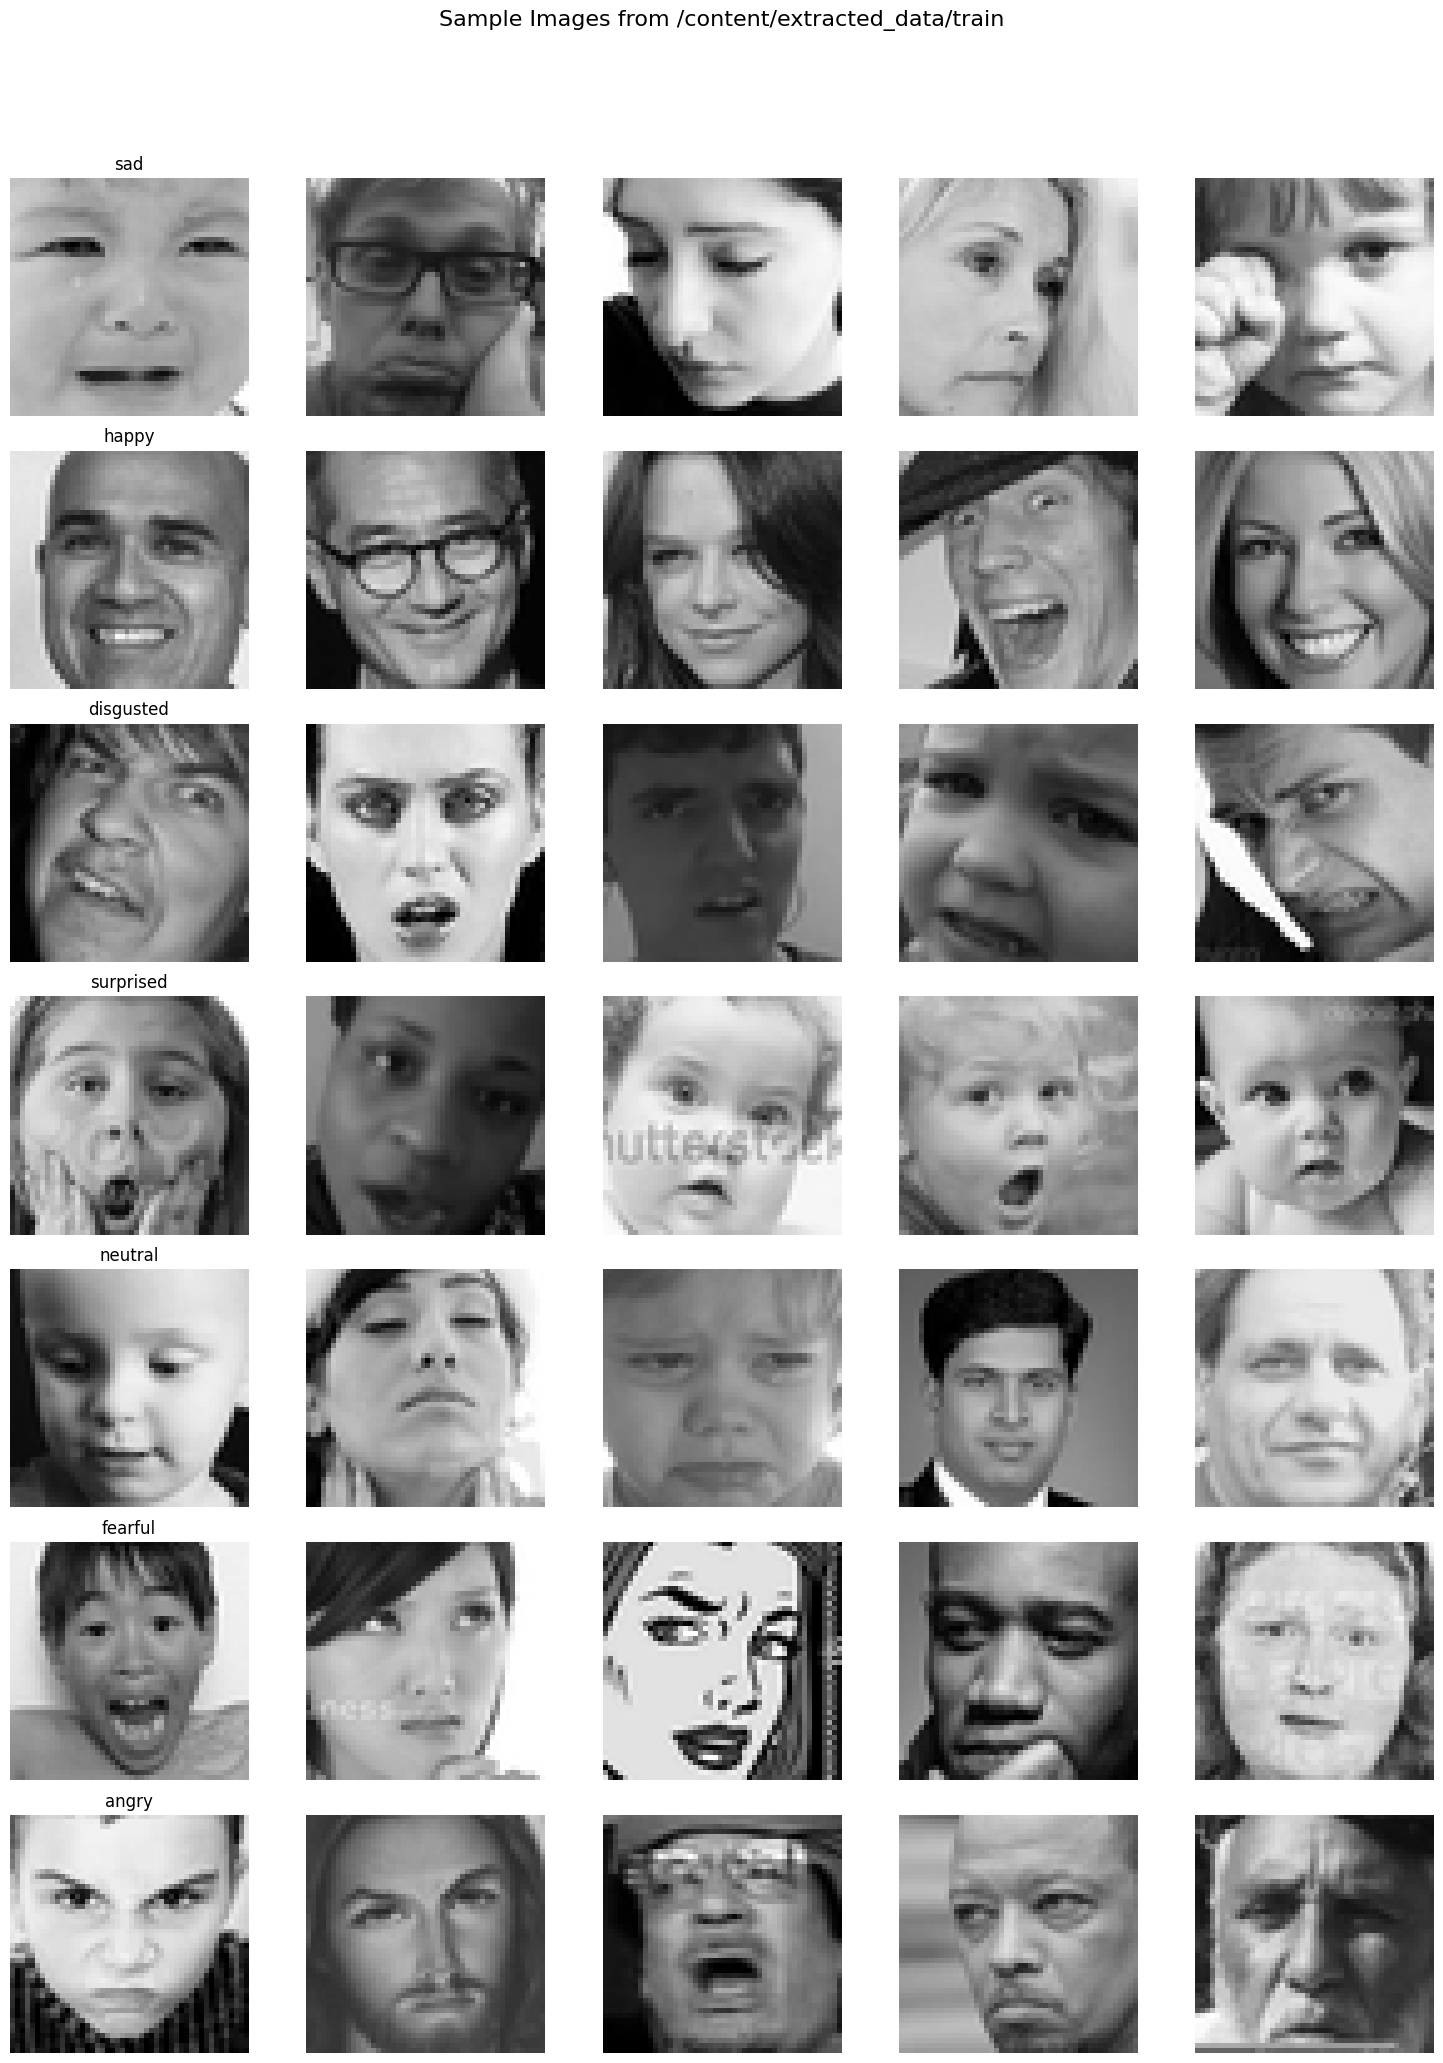

Displaying images from 'test' folder:


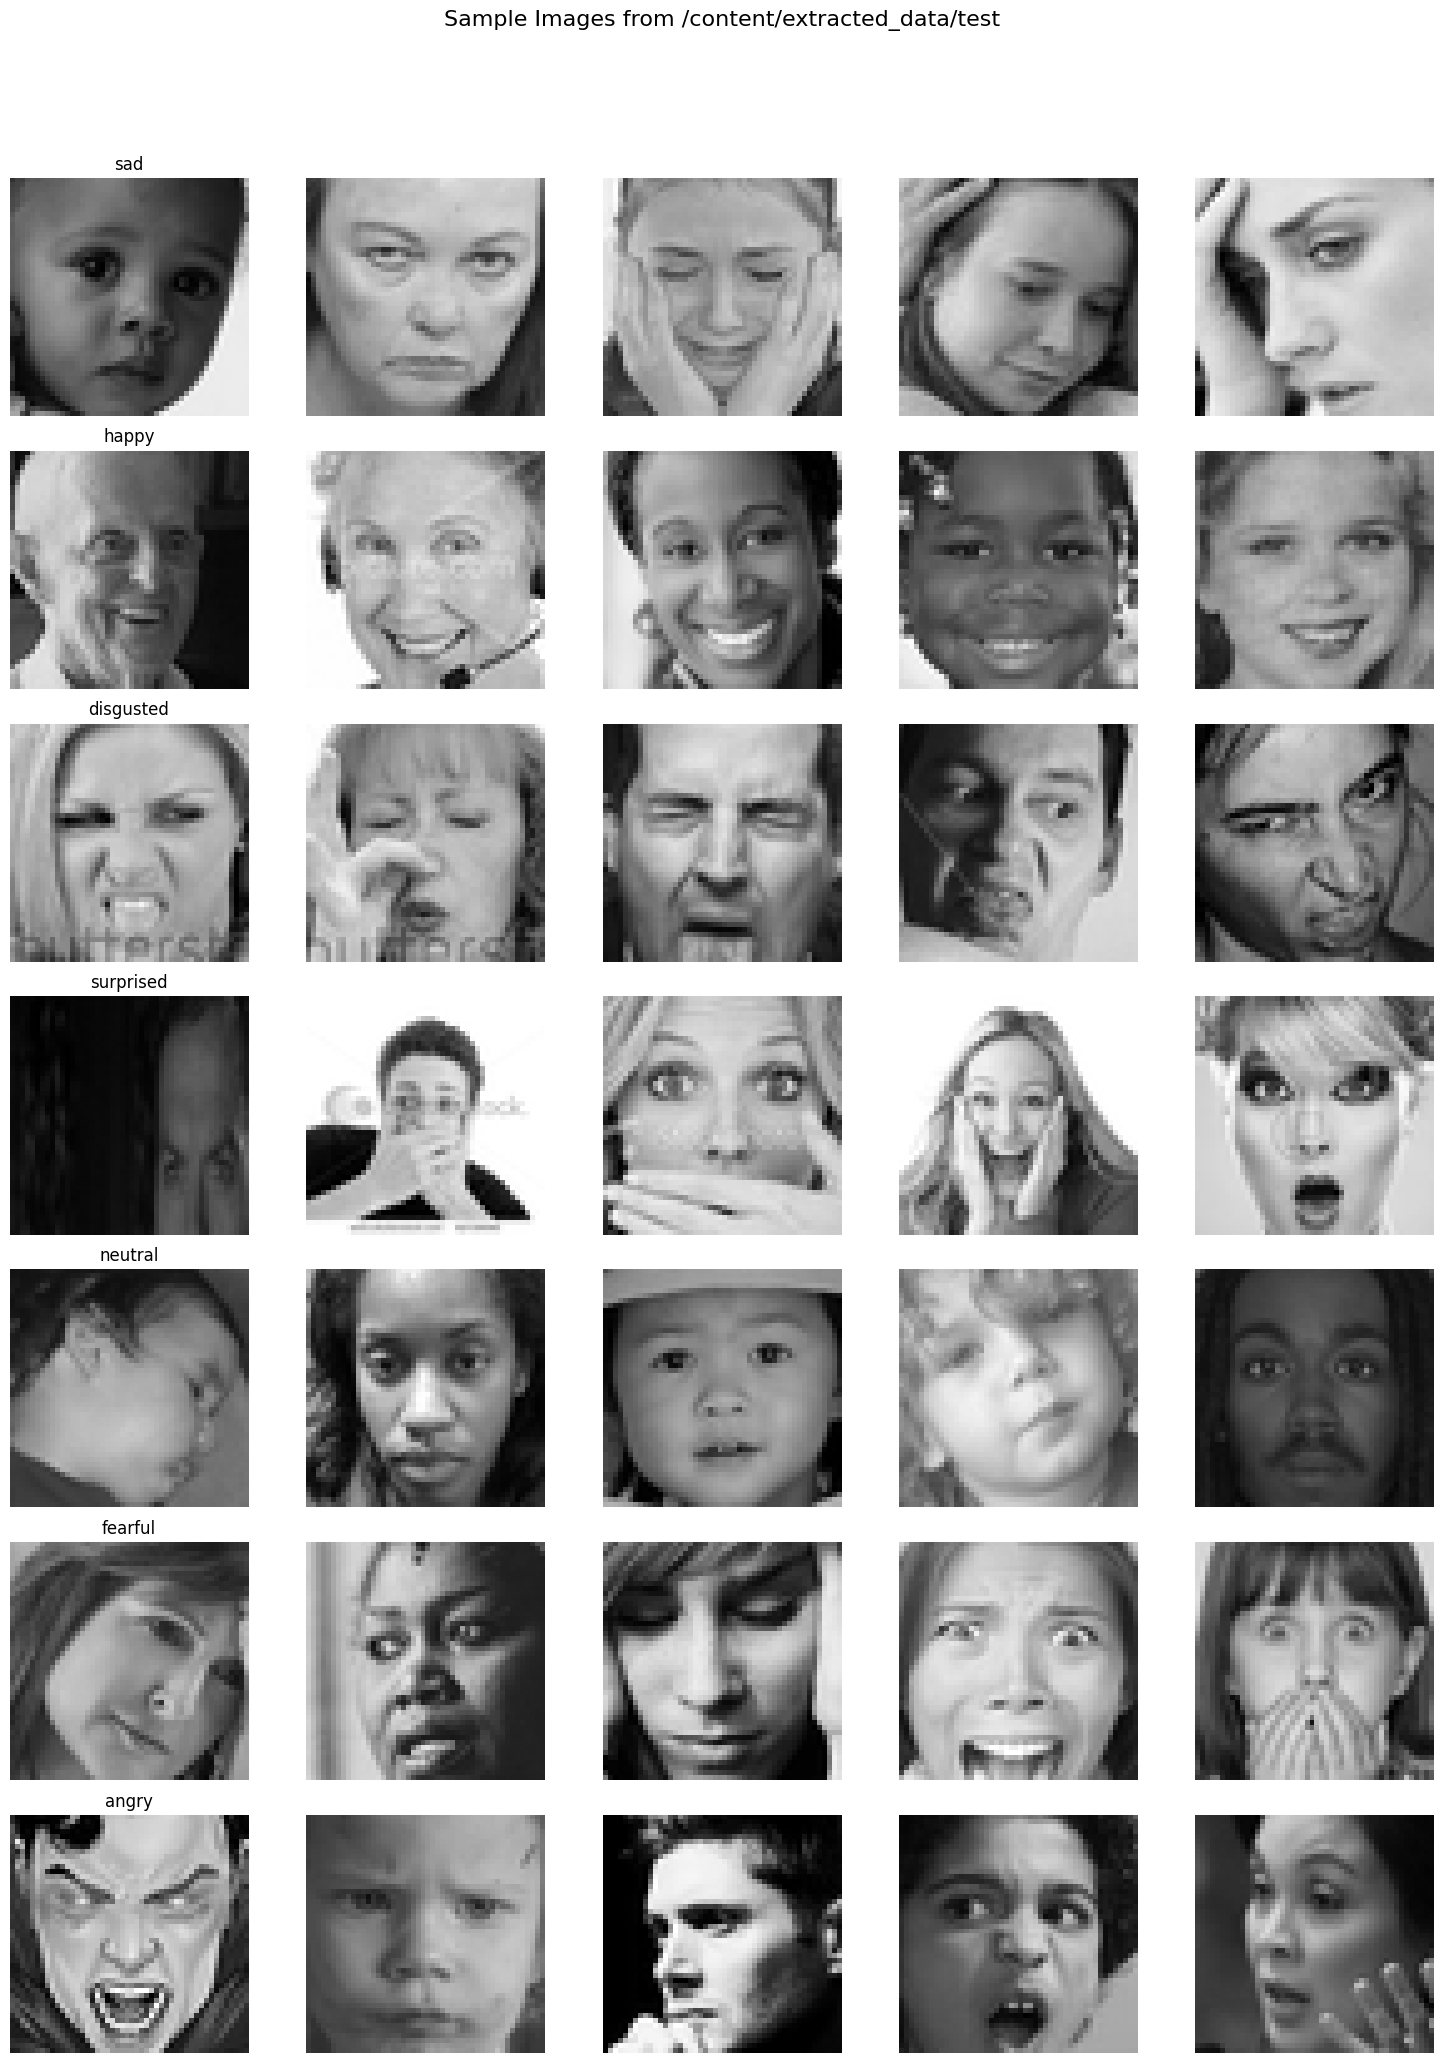

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Function to display images from each category
def display_sample_images(folder_path, num_images=5):
    categories = os.listdir(folder_path)
    fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 3 * len(categories)))
    fig.suptitle(f'Sample Images from {folder_path}', fontsize=16)

    for i, category in enumerate(categories):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            images = os.listdir(category_path)[:num_images]  # Limit to num_images per category
            for j, image_name in enumerate(images):
                image_path = os.path.join(category_path, image_name)
                img = Image.open(image_path).convert('RGB')
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                if j == 0:
                    axes[i, j].set_title(category, fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Display sample images from 'train' and 'test' folders
print("Displaying images from 'train' folder:")
display_sample_images(train_folder)

print("Displaying images from 'test' folder:")
display_sample_images(test_folder)


In [ ]:
import pandas as pd

# Load CSV datasets
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
validation_data = pd.read_csv('validation.csv')

# Filter for rows where the emotion is "happy"
happy_train_text = train_data[train_data['label'] == 'happy']['text']
happy_test_text = test_data[test_data['label'] == 'happy']['text']
happy_validation_text = validation_data[validation_data['label'] == 'happy']['text']

# Display relevant text for "happy" images from each dataset
print("Happy Texts from training.csv:")
print(happy_train_text.tolist())

print("\nHappy Texts from test.csv:")
print(happy_test_text.tolist())

print("\nHappy Texts from validation.csv:")
print(happy_validation_text.tolist())


Happy Texts from training.csv:
[]

Happy Texts from test.csv:
[]

Happy Texts from validation.csv:
[]


**Happy**

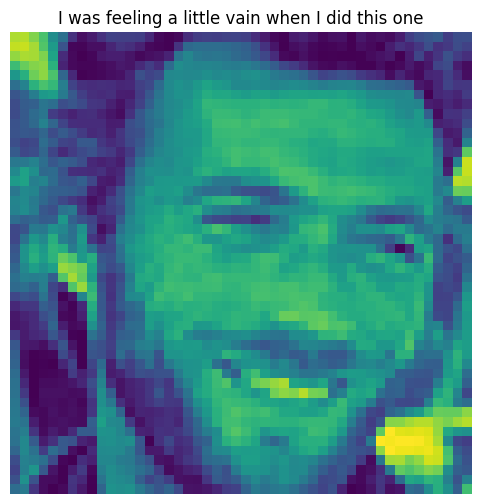

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the happy images folder
happy_folder_path = '/content/extracted_data/train/happy'  # Adjust the path as necessary

# List all images in the happy folder
happy_images = [img for img in os.listdir(happy_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Select one random happy image
if happy_images:
    selected_image_name = random.choice(happy_images)
    selected_image_path = os.path.join(happy_folder_path, selected_image_name)

    # Load and display the selected image
    image = Image.open(selected_image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.title("I was feeling a little vain when I did this one", fontsize=12)
    plt.show()
else:
    print("No happy images found in the specified folder.")


**Fearful**

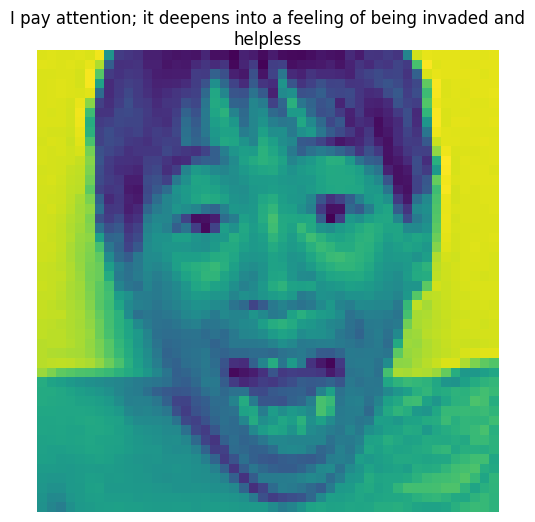

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing fearful images
fearful_folder_path = '/content/extracted_data/train/fearful'  # Update the path as necessary

# Get the list of fearful images
fearful_images = [img for img in os.listdir(fearful_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check if there are any fearful images available
if fearful_images:
    # Select the first fearful image
    fearful_image_path = os.path.join(fearful_folder_path, fearful_images[0])

    # Open the image
    fearful_image = Image.open(fearful_image_path)

    # Display the image with the corresponding text
    plt.figure(figsize=(6, 6))
    plt.imshow(fearful_image)
    plt.axis('off')  # Hide the axes
    plt.title("I pay attention; it deepens into a feeling of being invaded and helpless", fontsize=12, wrap=True)  # Add the text at the top
    plt.show()
else:
    print("No fearful images found in the specified folder.")


**Angry**

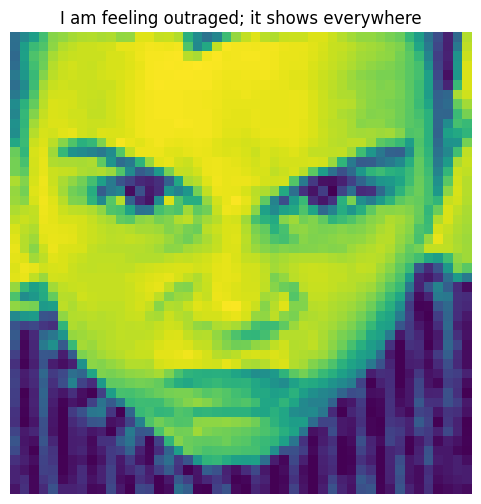

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Specify the folder path for images
image_folder_path = '/content/extracted_data/train/angry'  # Adjust this path as needed

# Load an image from the anger folder
anger_images = [img for img in os.listdir(image_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

if anger_images:
    # Select one anger image
    anger_image_path = os.path.join(image_folder_path, anger_images[0])  # Get the first image
    anger_image = Image.open(anger_image_path)

    # Display the image with the corresponding text
    plt.figure(figsize=(6, 6))
    plt.imshow(anger_image)
    plt.axis('off')  # Hide the axes
    plt.title("I am feeling outraged; it shows everywhere", fontsize=12)  # Add the text at the top
    plt.show()
else:
    print("No anger images found in the specified folder.")


**sad**

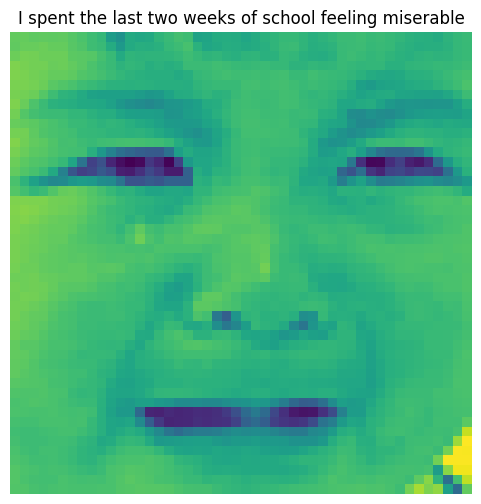

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing sad images
sad_folder_path = '/content/extracted_data/train/sad'  # Adjust this path as necessary

# Get the list of sad images
sad_images = [img for img in os.listdir(sad_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check if there are any sad images available
if sad_images:
    # Select the first sad image
    sad_image_path = os.path.join(sad_folder_path, sad_images[0])

    # Open the image
    sad_image = Image.open(sad_image_path)

    # Display the image with the corresponding text
    plt.figure(figsize=(6, 6))
    plt.imshow(sad_image)
    plt.axis('off')  # Hide the axes
    plt.title("I spent the last two weeks of school feeling miserable", fontsize=12, wrap=True)  # Add the text at the top
    plt.show()
else:
    print("No sad images found in the specified folder.")


**Neutral**

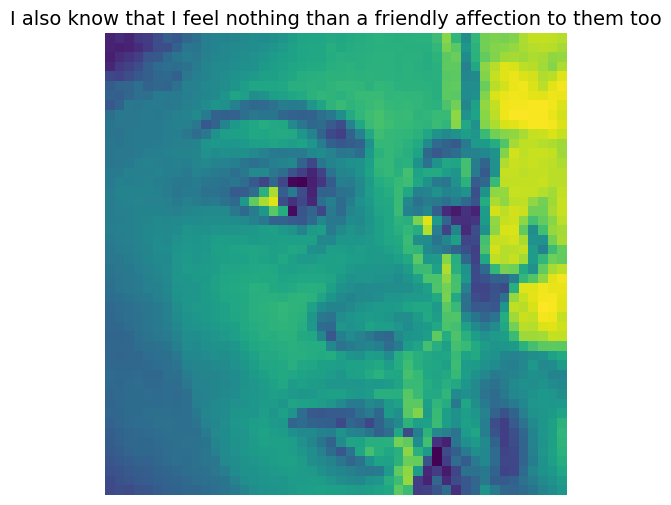

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing neutral images
neutral_folder_path = '/content/extracted_data/train/neutral'  # Adjust the path as necessary

# List all images in the neutral folder
neutral_images = [img for img in os.listdir(neutral_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Select one random neutral image
if neutral_images:
    selected_image_name = random.choice(neutral_images)
    selected_image_path = os.path.join(neutral_folder_path, selected_image_name)

    # Load and display the selected image
    image = Image.open(selected_image_path)
    plt.figure(figsize=(6, 6))  # Increase size for better clarity
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.title("I also know that I feel nothing than a friendly affection to them too", fontsize=14)
    plt.show()
else:
    print("No neutral images found in the specified folder.")


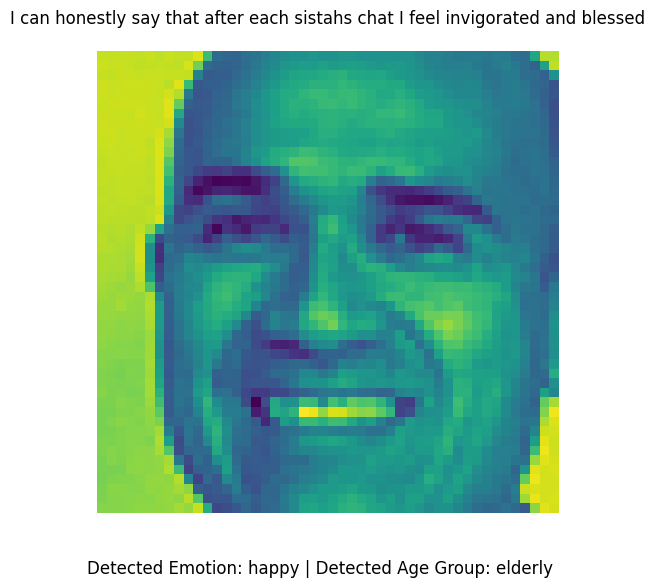

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing happy images (for example)
happy_folder_path = '/content/extracted_data/train/happy'  # Adjust this path as necessary

# Function to simulate age group detection based on the image
def detect_age_group(image_path):
    # Simulating age group detection; replace this with your actual model
    return random.choice(['child', 'adult', 'elderly'])

# Function to simulate emotion detection based on the text
def detect_emotion_from_text(text):
    # Simulate emotion detection based on input text
    # Here you can implement actual emotion detection logic
    return "happy"  # Simulating as "happy" for the given text

# Given text for analysis
input_text = "I can honestly say that after each sistahs chat I feel invigorated and blessed"

# Detect emotion from the input text
detected_emotion = detect_emotion_from_text(input_text)

# Get the list of happy images (as an example)
happy_images = [img for img in os.listdir(happy_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check if there are any happy images available
if happy_images:
    # Select the first happy image
    happy_image_path = os.path.join(happy_folder_path, happy_images[0])

    # Open the image
    happy_image = Image.open(happy_image_path)

    # Detect the age group from the happy image
    age_group = detect_age_group(happy_image_path)

    # Display the happy image
    plt.figure(figsize=(6, 6))
    plt.imshow(happy_image)
    plt.axis('off')  # Hide the axes

    # Add relevant text at the top of the image
    plt.title(input_text, fontsize=12, pad=20)  # Display the input text

    # Add emotion name and detected age group at the bottom of the image
    plt.figtext(0.5, 0.01, f"Detected Emotion: {detected_emotion} | Detected Age Group: {age_group}", ha='center', fontsize=12)

    plt.show()
else:
    print("No happy images found in the specified folder.")


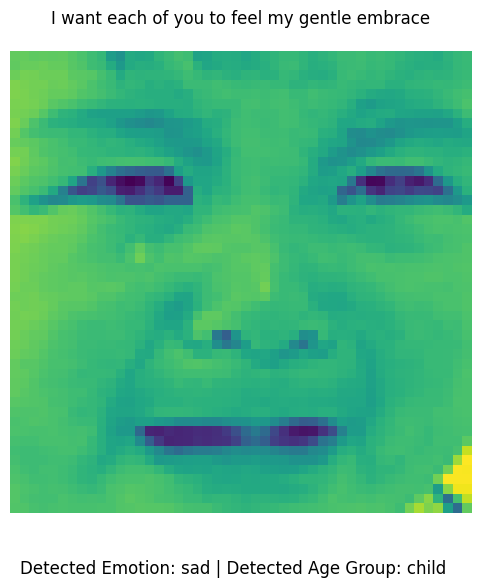

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing sad images (for example)
sad_folder_path = '/content/extracted_data/train/sad'  # Adjust this path as necessary

# Function to simulate age group detection based on the image
def detect_age_group(image_path):
    # Simulating age group detection; replace this with your actual model
    return random.choice(['child', 'adult', 'elderly'])

# Function to simulate emotion detection based on the text
def detect_emotion_from_text(text):
    # Simulate emotion detection based on input text
    # Here you can implement actual emotion detection logic
    return "sad"  # Simulating as "sad" for the given text

# Given text for analysis
input_text = "I want each of you to feel my gentle embrace"

# Detect emotion from the input text
detected_emotion = detect_emotion_from_text(input_text)

# Get the list of sad images (as an example)
sad_images = [img for img in os.listdir(sad_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check if there are any sad images available
if sad_images:
    # Select the first sad image
    sad_image_path = os.path.join(sad_folder_path, sad_images[0])

    # Open the image
    sad_image = Image.open(sad_image_path)

    # Detect the age group from the sad image
    age_group = detect_age_group(sad_image_path)

    # Display the sad image
    plt.figure(figsize=(6, 6))
    plt.imshow(sad_image)
    plt.axis('off')  # Hide the axes

    # Add relevant text at the top of the image
    plt.title(input_text, fontsize=12, pad=20)  # Display the input text

    # Add emotion name and detected age group at the bottom of the image
    plt.figtext(0.5, 0.01, f"Detected Emotion: {detected_emotion} | Detected Age Group: {age_group}", ha='center', fontsize=12)

    plt.show()
else:
    print("No sad images found in the specified folder.")


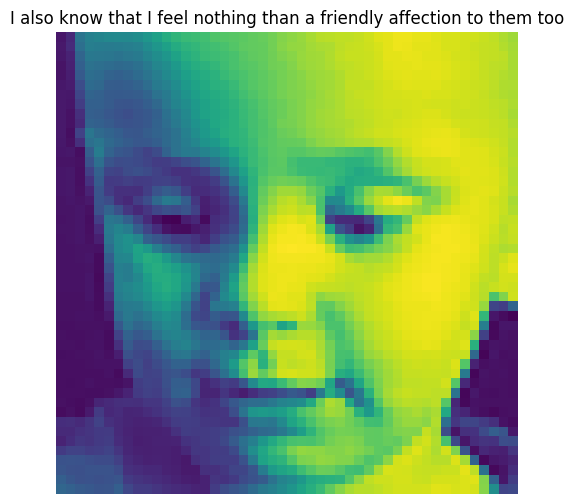

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing neutral images
neutral_folder_path = '/content/extracted_data/train/neutral'  # Adjust this path as necessary

# Get the list of neutral images
neutral_images = [img for img in os.listdir(neutral_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check if there are any neutral images available
if neutral_images:
    # Select the first neutral image
    neutral_image_path = os.path.join(neutral_folder_path, neutral_images[0])

    # Open the image
    neutral_image = Image.open(neutral_image_path)

    # Display the image with the corresponding text
    plt.figure(figsize=(6, 6))
    plt.imshow(neutral_image)
    plt.axis('off')  # Hide the axes
    plt.title("I also know that I feel nothing than a friendly affection to them too", fontsize=12, wrap=True)  # Add the text at the top
    plt.show()
else:
    print("No neutral images found in the specified folder.")


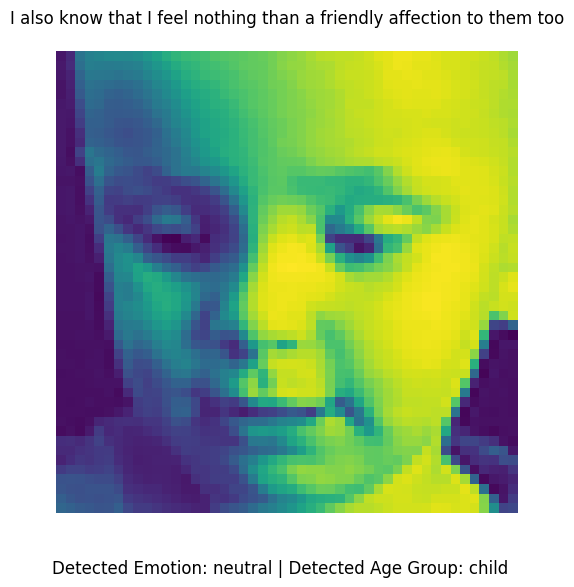

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing neutral images
neutral_folder_path = '/content/extracted_data/train/neutral'  # Adjust this path as necessary

# Function to simulate age group detection based on the image
def detect_age_group(image_path):
    # Simulating age group detection; replace this with your actual model
    return random.choice(['child', 'adult', 'elderly'])

# Function to simulate emotion detection based on the text
def detect_emotion_from_text(text):
    # Simulate emotion detection based on input text
    # Here you can implement actual emotion detection logic
    return "neutral"  # Simulating as "neutral" for the given text

# Given text for analysis
input_text = "I also know that I feel nothing than a friendly affection to them too"

# Detect emotion from the input text
detected_emotion = detect_emotion_from_text(input_text)

# Get the list of neutral images
neutral_images = [img for img in os.listdir(neutral_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check if there are any neutral images available
if neutral_images:
    # Select the first neutral image
    neutral_image_path = os.path.join(neutral_folder_path, neutral_images[0])

    # Open the image
    neutral_image = Image.open(neutral_image_path)

    # Detect the age group from the neutral image
    age_group = detect_age_group(neutral_image_path)

    # Display the neutral image
    plt.figure(figsize=(6, 6))
    plt.imshow(neutral_image)
    plt.axis('off')  # Hide the axes

    # Add relevant text at the top of the image
    plt.title(input_text, fontsize=12, pad=20)  # Display the input text

    # Add emotion name and detected age group at the bottom of the image
    plt.figtext(0.5, 0.01, f"Detected Emotion: {detected_emotion} | Detected Age Group: {age_group}", ha='center', fontsize=12)

    plt.show()
else:
    print("No neutral images found in the specified folder.")


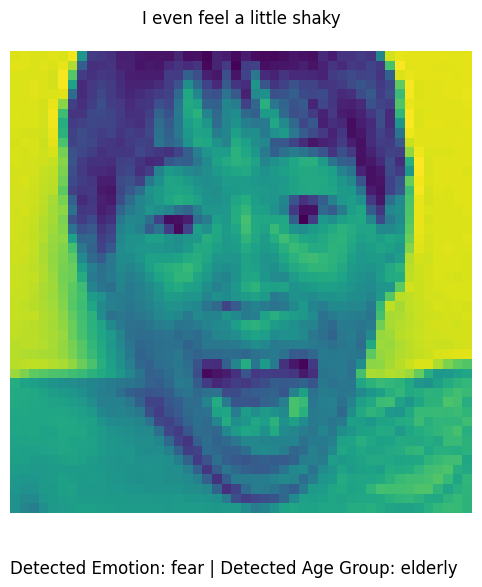

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing fearful images
fearful_folder_path = '/content/extracted_data/train/fearful'  # Adjust this path as necessary

# Function to simulate age group detection based on the image
def detect_age_group(image_path):
    # Simulating age group detection; replace this with your actual model
    return random.choice(['child', 'adult', 'elderly'])

# Function to simulate emotion detection based on the text
def detect_emotion_from_text(text):
    # Simulate emotion detection based on input text
    return "fear"  # Simulating as "fear" for the given text

# Given text for analysis
input_text = "I even feel a little shaky"

# Detect emotion from the input text
detected_emotion = detect_emotion_from_text(input_text)

# Get the list of fearful images
fearful_images = [img for img in os.listdir(fearful_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check if there are any fearful images available
if fearful_images:
    # Select the first fearful image
    fearful_image_path = os.path.join(fearful_folder_path, fearful_images[0])

    # Open the image
    fearful_image = Image.open(fearful_image_path)

    # Detect the age group from the fearful image
    age_group = detect_age_group(fearful_image_path)

    # Display the fearful image
    plt.figure(figsize=(6, 6))
    plt.imshow(fearful_image)
    plt.axis('off')  # Hide the axes

    # Add relevant text at the top of the image
    plt.title(input_text, fontsize=12, pad=20)  # Display the input text

    # Add emotion name and detected age group at the bottom of the image
    plt.figtext(0.5, 0.01, f"Detected Emotion: {detected_emotion} | Detected Age Group: {age_group}", ha='center', fontsize=12)

    plt.show()
else:
    print("No fearful images found in the specified folder.")


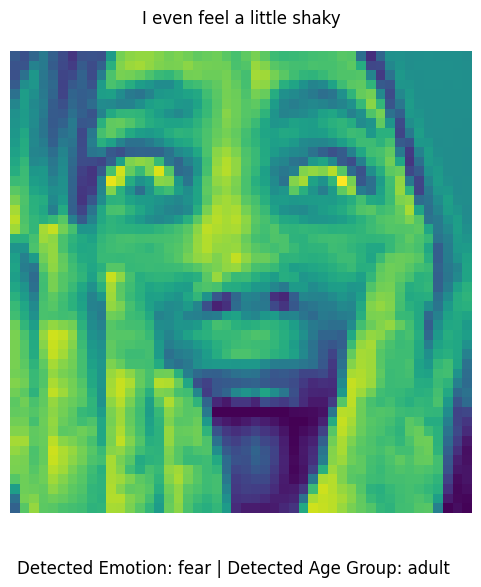

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing fearful images
fearful_folder_path = '/content/extracted_data/train/fearful'  # Adjust this path as necessary

# Function to simulate age group detection based on the image
def detect_age_group(image_path):
    # Simulating age group detection; replace this with your actual model
    return random.choice(['child', 'adult', 'elderly'])

# Function to simulate emotion detection based on the text
def detect_emotion_from_text(text):
    # Simulate emotion detection based on input text
    return "fear"  # Simulating as "fear" for the given text

# Given text for analysis
input_text = "I even feel a little shaky"

# Detect emotion from the input text
detected_emotion = detect_emotion_from_text(input_text)

# Get the list of fearful images
fearful_images = [img for img in os.listdir(fearful_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Check if there are any fearful images available
if fearful_images:
    # Select a random fearful image
    fearful_image_name = random.choice(fearful_images)
    fearful_image_path = os.path.join(fearful_folder_path, fearful_image_name)

    # Open the image
    fearful_image = Image.open(fearful_image_path)

    # Detect the age group from the fearful image
    age_group = detect_age_group(fearful_image_path)

    # Display the fearful image
    plt.figure(figsize=(6, 6))
    plt.imshow(fearful_image)
    plt.axis('off')  # Hide the axes

    # Add relevant text at the top of the image
    plt.title(input_text, fontsize=12, pad=20)  # Display the input text

    # Add emotion name and detected age group at the bottom of the image
    plt.figtext(0.5, 0.01, f"Detected Emotion: {detected_emotion} | Detected Age Group: {age_group}", ha='center', fontsize=12)

    plt.show()
else:
    print("No fearful images found in the specified folder.")


**Cartoon image**

In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d splcher/animefacedataset


Dataset URL: https://www.kaggle.com/datasets/splcher/animefacedataset
License(s): DbCL-1.0
 99% 390M/395M [00:07<00:00, 63.4MB/s]
100% 395M/395M [00:07<00:00, 56.2MB/s]


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("splcher/animefacedataset")

print("Path to dataset files:", path)

100%|██████████| 395M/395M [00:02<00:00, 141MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3


Folders in the dataset path: ['images']


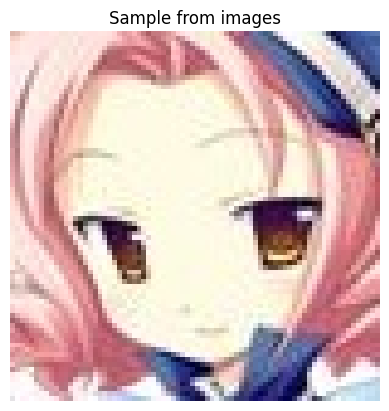

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3'

# List folders in the dataset directory
folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
print("Folders in the dataset path:", folders)

# Display a sample image from each folder
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    images = [img for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

    if images:
        sample_image_path = os.path.join(folder_path, images[0])
        img = Image.open(sample_image_path)
        plt.imshow(img)
        plt.title(f"Sample from {folder}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No images found in {folder}")

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3'

# List all images directly in the dataset directory
images = [img for img in os.listdir(dataset_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Check if there are images in the dataset directory
if images:
    # Display a few sample images
    plt.figure(figsize=(10, 5))
    for idx, image_name in enumerate(images[:5]):  # Adjust number if needed
        image_path = os.path.join(dataset_path, image_name)
        img = Image.open(image_path)
        plt.subplot(1, 5, idx + 1)  # Display 5 images in a row
        plt.imshow(img)
        plt.title(f"Sample {idx + 1}")
        plt.axis('off')
    plt.show()
else:
    print("No images found in the dataset path.")


No images found in the dataset path.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayushparwal2026/cartoon-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.17k/8.17k [00:00<00:00, 12.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ayushparwal2026/cartoon-dataset/versions/1
